### Загрузка данных

In [21]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

water_data = pd.read_csv('C:/Users/bev20/OneDrive/Desktop/Курс Phyton/3 часть/2/water.csv').rename(columns = {'Unnamed: 0': 'id'})
water_data.head()

,id,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


### Задание 1. Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

1. Построим точечный график между жесткостью воды (hardness) и смертностью населения (mortality)

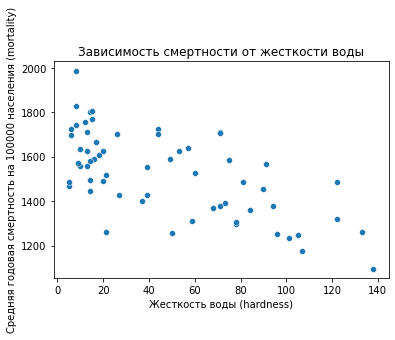

In [10]:
gr = sns.scatterplot(data = water_data, x='hardness', y='mortality')
gr = gr.set(xlabel='Жесткость воды (hardness)', ylabel='Cредняя годовая смертность на 100000 населения (mortality)',
        title='Зависимость смертности от жесткости воды')

Вывод: зависимость между hardness и mortality присутствует (обратно пропорциональная)

2. Рассчитаем коэффициенты корреляции Пирсона и Спирмена

In [11]:
# считаем коэф. корреляции Пирсона
water_data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [12]:
# считаем коэф. корреляции Спирмана
water_data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Вывод: Значение коэффициентов корреляции со знаком "-", подтверждает обратную линейную зависимость. Коэффициент Спирмена дает более консервативную оценку взаимосвязи показателей

3. Построим модель линейной регрессии

In [16]:
# Строим модель линейной регрессии
x = water_data[['hardness']]
y = water_data['mortality']
x_const = sm.add_constant(x) # техническая особенность библиотеки, надо руками добавить константу
model = sm.OLS(y, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           1.03e-08
Time:                        19:29:44   Log-Likelihood:                -388.28
No. Observations:                  61   AIC:                             780.6
Df Residuals:                      59   BIC:                             784.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.3556     29.298     57.217      0.0

Вывод: Модель построена. Коэффициент при переменой значим

4. Рассчитаем коэффициент детерминации

In [17]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1676.355601
hardness      -3.226092
dtype: float64
R2:  0.42882671931249716


5. Вывести график остатков

Text(0.5, 1.0, 'Зависимость прогноза модели от остатков')

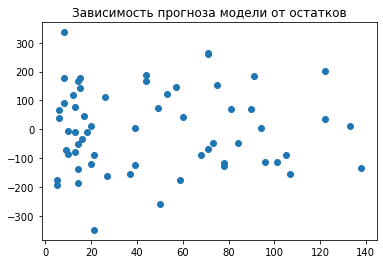

In [27]:
plt.scatter(x_const.iloc[:, 1], results.resid)
plt.title('Зависимость прогноза модели от остатков')

Text(0.5, 1.0, 'Распределение остатков регрессии')

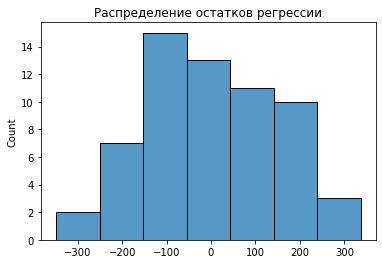

In [30]:
sns.histplot(results.resid)
plt.title('Распределение остатков регрессии')

Вывод: Явных зависимостей остатков модели от прогноза модели на точечной диаграмме не видно. На гистограмме распредления  - распредление отлично от нормального

Вывод по заданию 1: Линейная модель имеет высокий R2, нет аномалий в остатках. Коэффициенты модели значимы. Связь между смертностью и жетскостью воды существует. Модель можно использовать для прогноза

### Задание 2. Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

#### Северные города

In [32]:
water_north = water_data[water_data['location'] == 'North'].copy()

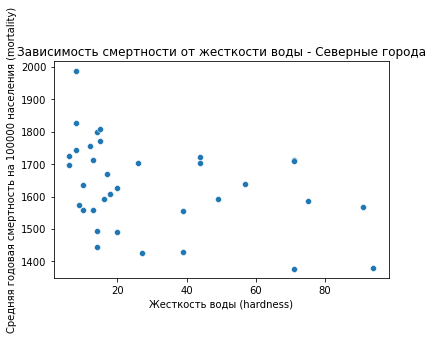

In [34]:
gr_n = sns.scatterplot(data = water_north, x='hardness', y='mortality')
gr_n = gr_n.set(xlabel='Жесткость воды (hardness)', ylabel='Cредняя годовая смертность на 100000 населения (mortality)',
        title='Зависимость смертности от жесткости воды - Северные города')

In [35]:
# считаем коэф. корреляции Пирсона
water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [36]:
# считаем коэф. корреляции Спирмана
water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [37]:
# Строим модель линейной регрессии
x = water_north[['hardness']]
y = water_north['mortality']
x_const = sm.add_constant(x) # техническая особенность библиотеки, надо руками добавить константу
model_n = sm.OLS(y, x_const)
results_n = model_n.fit()
print(results_n.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0293
Time:                        20:00:49   Log-Likelihood:                -218.78
No. Observations:                  35   AIC:                             441.6
Df Residuals:                      33   BIC:                             444.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.3128     33.785     50.091      0.0

In [38]:
print('Parameters: ', results_n.params)
print('R2: ', results_n.rsquared)

Parameters:  const       1692.312801
hardness      -1.931342
dtype: float64
R2:  0.1358643664207171


Text(0.5, 1.0, 'Зависимость прогноза модели от остатков')

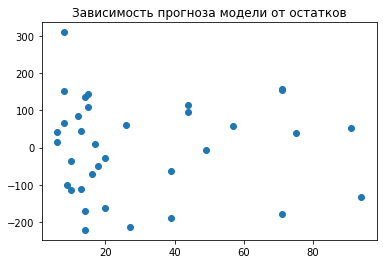

In [39]:
plt.scatter(x_const.iloc[:, 1], results_n.resid)
plt.title('Зависимость прогноза модели от остатков')

Text(0.5, 1.0, 'Распределение остатков регрессии')

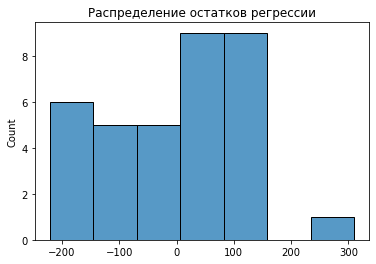

In [40]:
sns.histplot(results_n.resid)
plt.title('Распределение остатков регрессии')

Вывод по Южным городам: Зависимость между Жесткостью воды и смертностью слабая (коэффициент корреляции менее 0.4). Несмотря на то, что коэффициенты при переменных в модели регрессии значимы (p-value <0.05), ее предсказательная способность низкая: коэффициент детерминации 0.13. Качество прогноза по этой модели будет низким

#### Южные города

In [41]:
water_s = water_data[water_data['location'] == 'South'].copy()

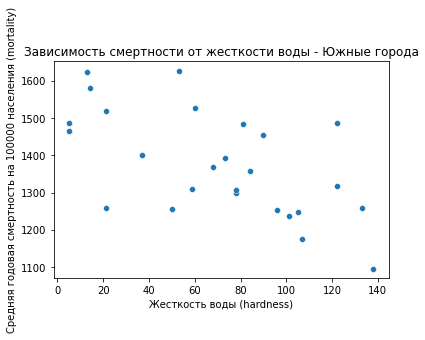

In [43]:
gr_s = sns.scatterplot(data = water_s, x='hardness', y='mortality')
gr_s = gr_s.set(xlabel='Жесткость воды (hardness)', ylabel='Cредняя годовая смертность на 100000 населения (mortality)',
        title='Зависимость смертности от жесткости воды - Южные города')

In [44]:
# считаем коэф. корреляции Пирсона
water_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [45]:
# считаем коэф. корреляции Спирмана
water_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [47]:
# Строим модель линейной регрессии
x = water_s[['hardness']]
y = water_s['mortality']
x_const = sm.add_constant(x) # техническая особенность библиотеки, надо руками добавить константу
model_s = sm.OLS(y, x_const)
results_s = model_s.fit()
print(results_s.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00113
Time:                        20:09:14   Log-Likelihood:                -159.06
No. Observations:                  26   AIC:                             322.1
Df Residuals:                      24   BIC:                             324.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.8150     45.431     33.519      0.0

In [48]:
print('Parameters: ', results_s.params)
print('R2: ', results_s.rsquared)

Parameters:  const       1522.815049
hardness      -2.092718
dtype: float64
R2:  0.36258856243646054


Text(0.5, 1.0, 'Зависимость прогноза модели от остатков')

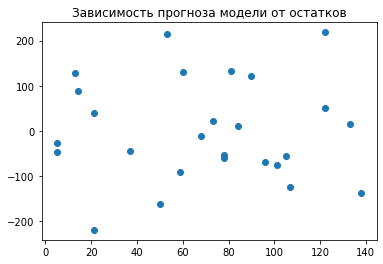

In [49]:
plt.scatter(x_const.iloc[:, 1], results_s.resid)
plt.title('Зависимость прогноза модели от остатков')

Text(0.5, 1.0, 'Распределение остатков регрессии')

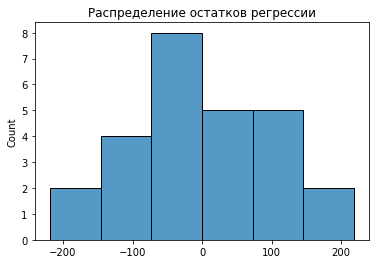

In [50]:
sns.histplot(results_s.resid)
plt.title('Распределение остатков регрессии')

Вывод по Северным городам: Зависимость между Жесткостью воды и смертностью присутствует (коэффициент корреляции 0.6). Коэффициенты при переменных в модели регрессии значимы (p-value <0.05), предсказательная способность модели для Северных городов все равно ниже Общей модели: коэффициент детерминации 0.36 (против Общей модели 0.42). Качество прогноза для Северных городов по этой модели будет ниже, чем по Общей модели.